# **CS2302 Data Structures**
**Assignment:** Lab 1 - Image processing using arrays

**Authors:** Eric Quezada

**Student ID:** 80532860

**Last modified:** February 9, 2023


**Introduction**
>  The purpose of this lab is to explore the use of arrays in the application of computer vision with a focus on image manipulation. Images are represented by arrays, where each element in the array represents the location of a pixel in the image. The goal for this lab is to design algorithms that perform operations on these images by modifying the corresponding arrays associated with the images.

# Code Preparation and Provided Functions
Run the following cell to import all the required libraries and to activate the file upload widget. Upload all the image files that are attached on Blackboard to the Colab notebook using the widget. You can also use this widget to upload your own images, just re-run this cell and upload the new files.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pt
from timeit import default_timer as timer
from pathlib import Path
from PIL import Image

# Allow numpy lines to be of any width so they don't wrap
np.set_printoptions(linewidth=np.inf)

# Check if we are running Google Colab, if so, activate the file upload widget.
try:
  from google.colab import files

  uploaded_files = files.upload()
  using_colab = True
except ImportError:
  using_colab = False

Saving manhattan.jpeg to manhattan.jpeg
Saving city.jpeg to city.jpeg
Saving french_beach.jpeg to french_beach.jpeg
Saving flemish_proverbs.jpeg to flemish_proverbs.jpeg
Saving geometric_art_two.jpeg to geometric_art_two.jpeg
Saving geometric_art_one.jpeg to geometric_art_one.jpeg
Saving aboral_office.jpeg to aboral_office.jpeg
Saving ships_illusions.jpeg to ships_illusions.jpeg
Saving upside_down_umbrellas.jpeg to upside_down_umbrellas.jpeg
Saving upside_down_city.jpeg to upside_down_city.jpeg
Saving sunday_afternoon_park.jpeg to sunday_afternoon_park.jpeg
Saving mona_lisa.jpeg to mona_lisa.jpeg
Saving kiwi.jpeg to kiwi.jpeg
Saving gloves.jpeg to gloves.jpeg
Saving park.jpeg to park.jpeg
Saving arches_park.jpg to arches_park.jpg
Saving hokusai_wave.jpeg to hokusai_wave.jpeg
Saving mexico.jpeg to mexico.jpeg
Saving sports.jpg to sports.jpg
Saving obama.jpg to obama.jpg
Saving liberty.png to liberty.png
Saving flag.png to flag.png
Saving eagle.png to eagle.png


The code cell below contains all the provided starter functions. DO NOT CHANGE ANY CODE IN THIS CELL!

In [ ]:
# ******************** PROVIDED FUNCTIONS (DON'T CHANGE THIS!) ********************
def read_image_from_file(filename, size=None):
    '''Read an image from a given filename'''
    # Check that the file actually exists
    assert Path(filename).exists(), f'{filename} does not exist'

    # Read the raw image using the imaging library
    raw_image = Image.open(filename)

    if size:
      raw_image = raw_image.resize(size, Image.BILINEAR)

    # Convert that image into an array with values from 0 to 255
    im_array = np.asarray(raw_image, dtype=np.uint8)

    if len(im_array.shape) >= 3:
      im_array = im_array[:, :, :3]
    return im_array

def resize_image(im, size):
  I = Image.fromarray(im)
  I = I.resize(size, Image.BILINEAR)
  return np.asarray(I, dtype=np.uint8)

def plot_image(im, title='', filename=None, size=(4, 4)):
    '''Plot a single image to the screen'''
    return plot_image_grid([im], 1, 1, title, titles=[], filename=filename, size=size)

def plot_image_with_rectangle(im, rect_row, rect_col, rw, rh, title='', filename=None, size=(5, 5)):
    '''Plots a single image to the screen with a rectangle embedded in it'''
    fig, ax = plt.subplots(figsize=size)
    ax.set_title(title)

    for axi in fig.get_axes():
        # Remove plot ticks
        axi.set_yticks([])
        axi.set_xticks([])
        # Remove outline around plot
        axi.spines['top'].set_visible(False)
        axi.spines['right'].set_visible(False)
        axi.spines['left'].set_visible(False)
        axi.spines['bottom'].set_visible(False)

    # Check if the image is grayscale to display the colors correctly
    if len(im.shape) == 2:
        ax.imshow(im, cmap='gray')
    else:
        ax.imshow(im)
    
    # Add rectangle
    ax.add_patch(pt.Rectangle((rect_row, rect_col), rh, rw, fill=False, edgecolor='red', lw=1))
    
    plt.tight_layout()
    plt.show()

    if filename is not None:
        output_dir = Path('./figures')
        if not output_dir.exists():
            output_dir.mkdir()
        plt.savefig(output_dir / filename)

def plot_image_grid(images, nrows, ncols, figure_title, titles=[], filename=None, size=(5, 5)):
    '''Plot multiple images in a grid'''
    fig, ax = plt.subplots(nrows, ncols, figsize=size)

    if len(titles) > 0:
      fig.suptitle(f'{figure_title}', fontsize='medium', weight='bold')
    else:
      titles = [figure_title]

    for axi in fig.get_axes():
        # Remove plot ticks
        axi.set_yticks([])
        axi.set_xticks([])
        # Remove outline around plot
        axi.spines['top'].set_visible(False)
        axi.spines['right'].set_visible(False)
        axi.spines['left'].set_visible(False)
        axi.spines['bottom'].set_visible(False)

    for idx, im in enumerate(images):
        r = idx % nrows
        c = idx // nrows

        if len(images) == 1:
            axi = ax
        elif nrows == 1 or ncols == 1:
            axi = ax[idx]
        else:
            axi = ax[r, c]

        axi.set_title(titles[idx])

        # Check if the image is grayscale to display the colors correctly
        if len(im.shape) == 2:
            axi.imshow(im, cmap='gray')
        else:
            axi.imshow(im)

    plt.tight_layout()
    plt.show()

    if filename is not None:
        output_dir = Path('./figures')
        if not output_dir.exists():
            output_dir.mkdir()
        plt.savefig(output_dir / filename)

    return fig, ax

# Lab Overview
One important real-life application of arrays is in the area of computer vision, where we use arrays to represent images and design algorithms that perform operations on these images by modifying their corresponding arrays.

Specifically, in computer vision a grayscale image with $m$ rows and $n$ columns is usually represented by an $m$ by $n$ array of integers $I$, where $I[r,c]$ is the intensity of the pixel in row $r$ and columns $c$.  Normally, we use 0 to signal a black pixel and 255 to signal a white one.

The figure below shows a grayscale image and the corresponding array representation.

In [ ]:
# Read the image file as an array
I = read_image_from_file('digit.png')

# Display the image
plot_image(I, 'Handwritten Digit 0')

# Display the array representation of the image
print(I)

# Display some information about the image array
print('Array has a shape of', I.shape, 'so it has', I.shape[0], 'rows and', I.shape[1], 'columns')

AssertionError: ignored

Similarly, a color image is represented by an $m$ by $n$ by 3 array of integers $I$, where $I[:,:,0], I[:,:,1]$, and $I[:,:,2]$ represent the red, green, and blue channels in the image, respectively. 

In this lab you will be performing some basic image manipulation tasks using what you have learned about arrays and slicing.

# Part I: Image Manipulation with Arrays
For this part of the lab, you will need to solve the following problems using arrays. 


## Example: Read a color image from a file and display it on your screen (solution provided)

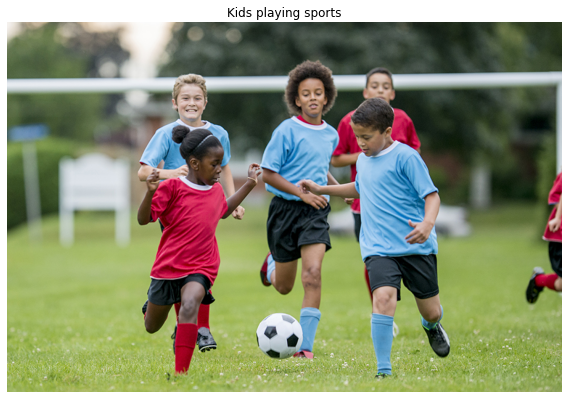

Array has shape (600, 900, 3)


In [ ]:
# Read a color image from a file
I = read_image_from_file('sports.jpg')

# Display it on screen
plot_image(I, 'Kids playing sports', size=(8, 8))

# Print some array information
print('Array has shape', I.shape)

##Problem 1 - Display the red, green, and blue channels of the color image
Recall that a color image is represented by an array of integers $I$, where $I[:,:,0], I[:,:,1]$, and $I[:,:,2]$ represent the red, green, and blue channels in the image, respectively. 

As a hint, the three resulting images will all look gray as they represent the intensities of their respective color. If there is a lot of red in a certain part of the image, the red channel will have values closer to 255 (white) so the red channel image will have brighter pixels in that area.

**Proposed Solution & Design Implementation:**

The proposed solution design is to extract the red, green, and blue channels of the uploadd image by assigning the varialbes "im_red", "im_green", and "im_blue" to their respective channels using array slicing and finally returning them as separate arrays.

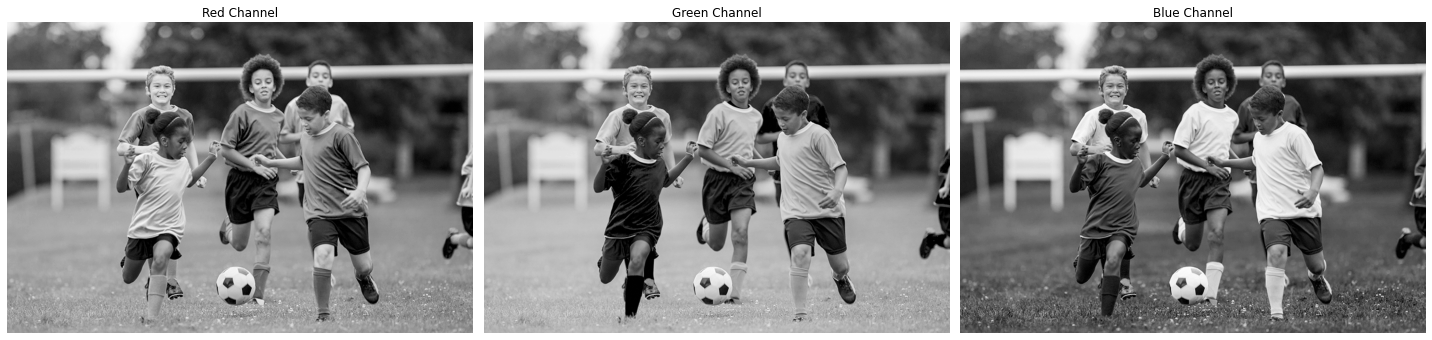

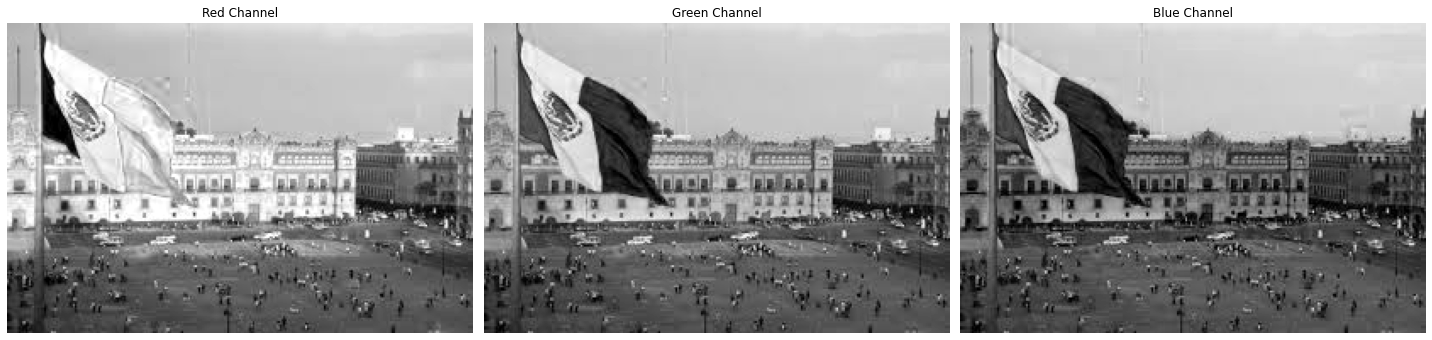

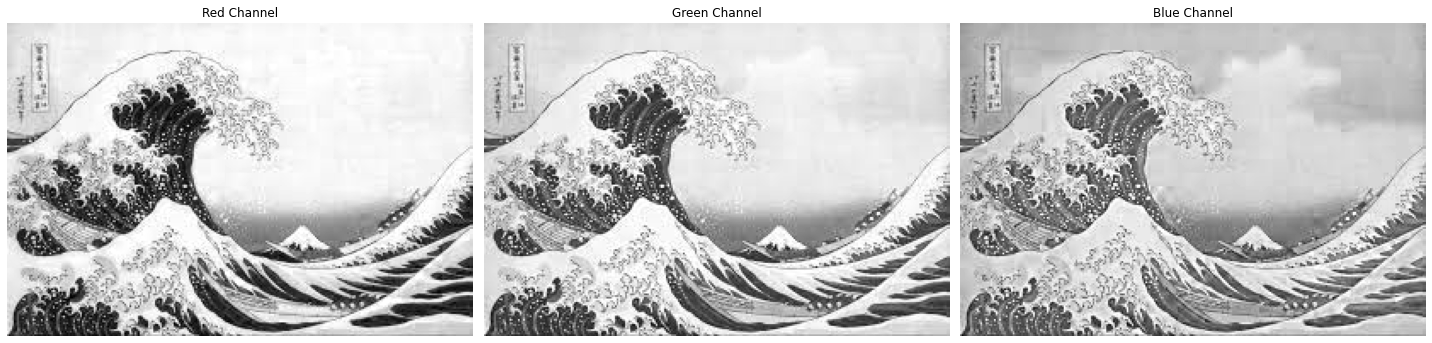

In [ ]:
def get_color_channels(im):
    '''Extract the red, green, and blue channels of the color image separately'''
    im_red = im[:,:,0]
    im_green = im[:,:,1]
    im_blue = im[:,:,2]
    return im_red, im_green, im_blue

# Test the function
# Sample image (provided)
I = read_image_from_file('sports.jpg')
im_red, im_green, im_blue = get_color_channels(I)
plot_image_grid([im_red, im_green, im_blue], 1, 3, '', ['Red Channel', 'Green Channel', 'Blue Channel'], size=(20, 5));

# Uploaded image (own)
I = read_image_from_file('mexico.jpeg')
im_red, im_green, im_blue = get_color_channels(I)
plot_image_grid([im_red, im_green, im_blue], 1, 3, '', ['Red Channel', 'Green Channel', 'Blue Channel'], size=(20, 5));

# Uploaded image (own)
I = read_image_from_file('hokusai_wave.jpeg')
im_red, im_green, im_blue = get_color_channels(I)
plot_image_grid([im_red, im_green, im_blue], 1, 3, '', ['Red Channel', 'Green Channel', 'Blue Channel'], size=(20, 5));


**Experimental Results:**
The run time of the function is O(1).

## Problem 2 - Display a subsampled version of the image that only includes the even rows and odd columns

**Proposed Solution & Design Implementation:**

The proposed solution design is to use array slicing to obtain the desired output

In [1]:
def subsampled(im):
    return im[::2, 1::2]


# Test the function

# Sample image (provided)
I = read_image_from_file('obama.jpg')
plot_image(subsampled(I), 'Subsampled Image', size=(20, 5));


# Uploaded image (own)
I = read_image_from_file('park.jpeg')
plot_image(subsampled(I), 'Subsampled Image', size=(20, 5));

# Uploaded image (own)
I = read_image_from_file('gloves.jpeg')
plot_image(subsampled(I), 'Subsampled Image', size=(20, 5));

NameError: ignored

**Experimental Results:**
The run time of the function is O(1)

## Problem 3 - Convert a color image to grayscale by taking its red, green, and blue channels and combining them with this formula: $Grayscale = 0.299R + 0.587G + 0.114B$

**Proposed Solution & Design Implementation:**

The proposed solution design is to use array slicing plus plugging in the appropiate values of the given Grayscale formula for the red, green and blue channels in order to achieve the desired output

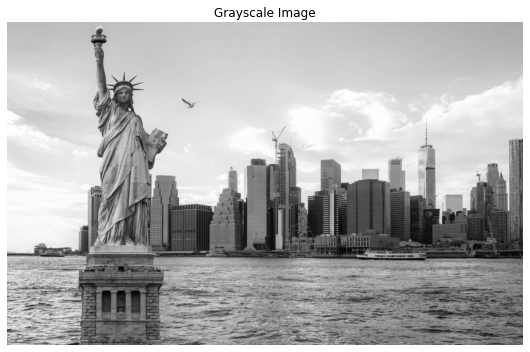

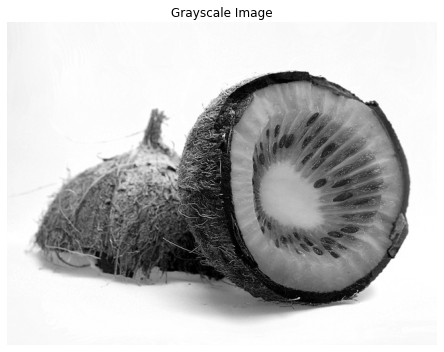

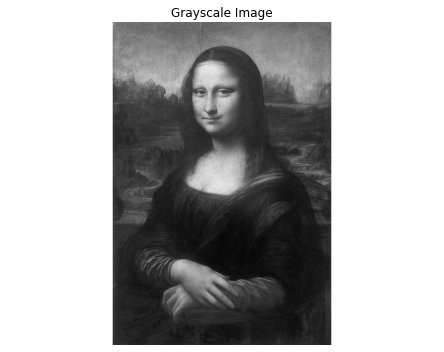

In [ ]:
def grayscale(im):
    return 0.299 * im[:, :, 0] + 0.587 * im[:, :, 1] + 0.114 * im[:, :, 2]

# Test the function

# Sample image (provided)
I = read_image_from_file('liberty.png')
plot_image(grayscale(I), 'Grayscale Image', size=(20, 5));

# Uploaded image (own)
I = read_image_from_file('kiwi.jpeg')
plot_image(grayscale(I), 'Grayscale Image', size=(20, 5));

# Uploaded image (own)
I = read_image_from_file('mona_lisa.jpeg')
plot_image(grayscale(I), 'Grayscale Image', size=(20, 5));

**Experimental Results:**

The run time of the function is O(n)

## Problem 4 - Display the negative of the grayscale version of the image. 
The formula is $Negative\_Grayscale = 255 - Grayscale$

**Proposed Solution & Design Implementation:**
The proposed solution for this problem is to subtract the grayscale value of the image from 255.

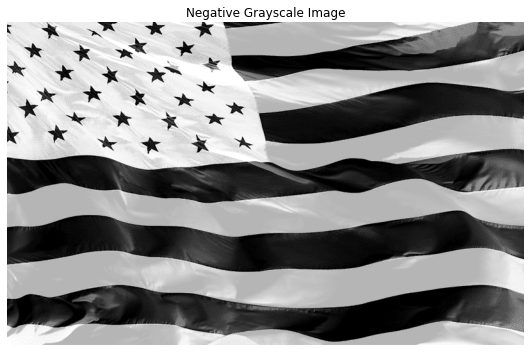

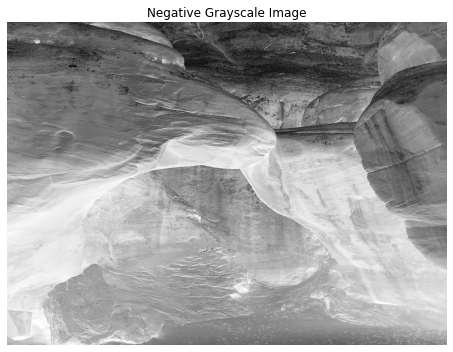

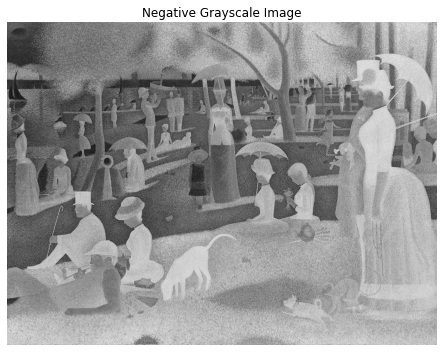

In [ ]:
def negative_grayscale(im):
    im_gray = grayscale(im)
    im_negative = 255 - im_gray
    return im_negative

# Test the function

# Sample image (provided)
I = read_image_from_file('flag.png')
plot_image(negative_grayscale(I), 'Negative Grayscale Image', size=(20, 5));

# Uploaded image (own)
I = read_image_from_file('arches_park.jpg')
plot_image(negative_grayscale(I), 'Negative Grayscale Image', size=(20, 5));

# Uploaded image (own)
I = read_image_from_file('sunday_afternoon_park.jpeg')
plot_image(negative_grayscale(I), 'Negative Grayscale Image', size=(20, 5));


The running time for this function is O(n).

## Problem 5 - Display a color image upside down


**Proposed Solution & Design Implementation**

The proposed solution to this problem to invert the image upside-down through the means of array slicing at the proper location.

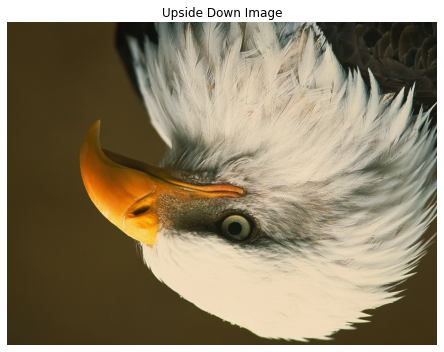

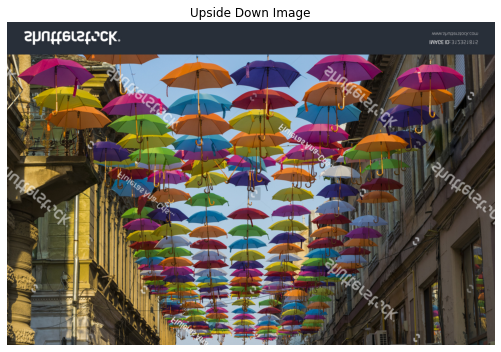

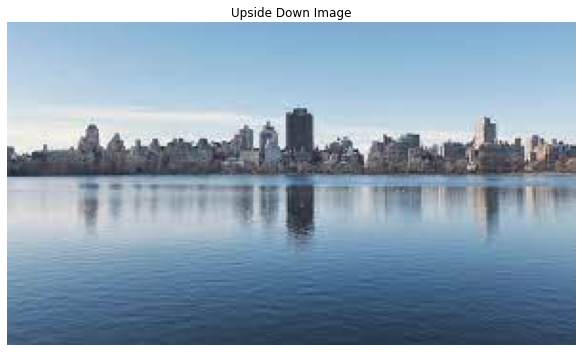

In [ ]:
def upside_down(im):
    return im[::-1, :]

# Test the function

# Sample image (provided)
I = read_image_from_file('eagle.png')
plot_image(upside_down(I), 'Upside Down Image', size=(20, 5));

# Uploaded image (own) 
I = read_image_from_file('upside_down_umbrellas.jpeg')
plot_image(upside_down(I), 'Upside Down Image', size=(20, 5));

# Uploaded image (own)
I = read_image_from_file('upside_down_city.jpeg')
plot_image(upside_down(I), 'Upside Down Image', size=(20, 5));

The running time for this function is O(n)




## Problem 6 - Display a color image mirrored (left-right)

**Proposed Solution & Design Implentation**

The proposed solution to this problem is to create a mirrored image effect through the means of array slicing at the proper image.

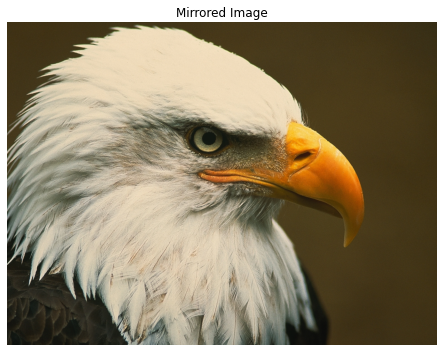

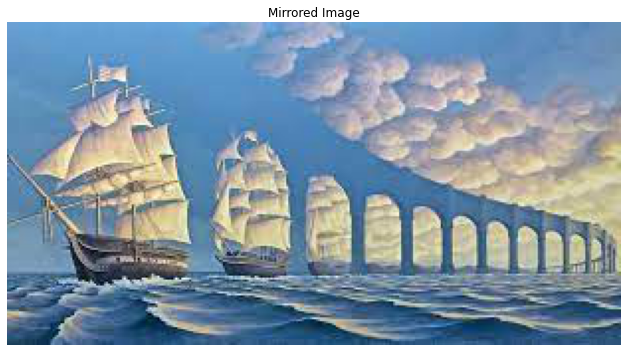

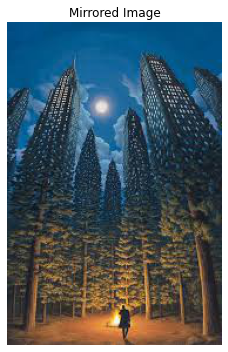

In [ ]:
def mirrored(im):
    return im[:,::-1]

# Test the function

# Sample image (provided)
I = read_image_from_file('eagle.png')
plot_image(mirrored(I), 'Mirrored Image', size=(20, 5));

# Uploaded image (own)
I = read_image_from_file('ships_illusions.jpeg')
plot_image(mirrored(I), 'Mirrored Image', size=(20, 5));

# Uploaded image (own)
I = read_image_from_file('aboral_office.jpeg')
plot_image(mirrored(I), 'Mirrored Image', size=(20, 5));

The running time for this function is O(n)

## Problem 7 - Display a cropped part of the image given the top-left coordinate as well as the width and height of the crop
The proposed solution to this problem is to return the cropped image with the parameters given to us in the definition of the method. The parameters represent "coordinates" that instruct the program to crop the image at the specified coordinates. 

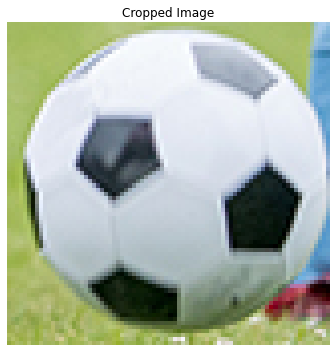

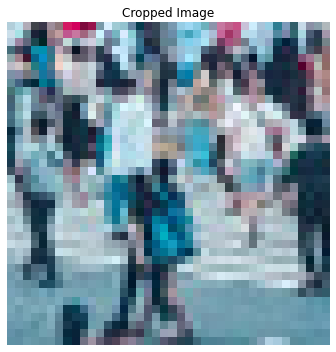

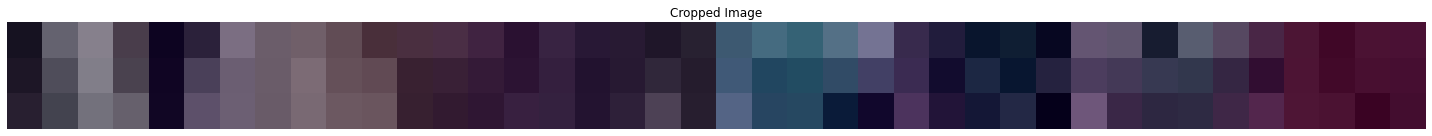

Expected Output


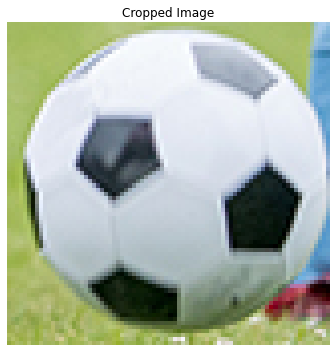

Expected Output


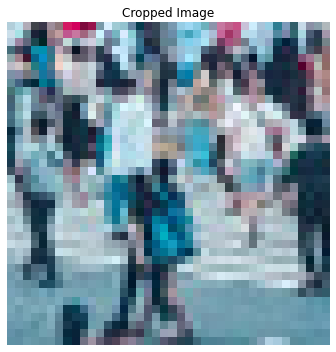

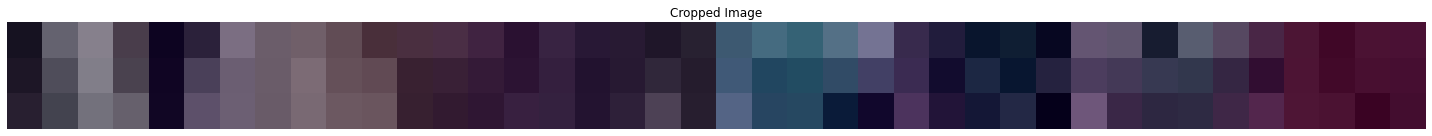

In [ ]:
def crop(im, top_left_row, top_left_col, crop_w, crop_h):
    '''Crop a part of the image given the top-left coordinates of the crop (top_left_row, top_left_col) 
        as well as the height and width of the crop (crop_h, crop_w)'''
    return im[top_left_row:top_left_row+crop_h, top_left_col:top_left_col+crop_w]

# Test the function
#Sample image (provided)
I = read_image_from_file('sports.jpg')
im_crop = crop(I, 470, 400, 80, 80)
plot_image(im_crop, 'Cropped Image', size=(20, 5));

I_two = read_image_from_file('city.jpeg')
im_crop_two = crop(I_two, 270, 200, 40, 40)
plot_image(im_crop_two, 'Cropped Image', size=(20, 5));

I_three = read_image_from_file('manhattan.jpeg')
im_crop_three = crop(I_three, 180, 140, 40, 40)
plot_image(im_crop_three, 'Cropped Image', size=(20, 5));

# Provide the expected output for this function
print('Expected Output')
plot_image(im_crop, 'Cropped Image', size=(20, 5));

print('Expected Output')
plot_image(im_crop_two, 'Cropped Image', size=(20, 5));

plot_image(im_crop_three, 'Cropped Image', size=(20, 5));

The running time for this function is O(n)

## Problem 8 - Interlacing
One approach to combine two or more images into a single one is by interlacing them together. That is, taking one row/column from one image, then one row/column from the other, repeating this until all rows/columns are used, and then resizing the output back to the original image size.

For example, let's say we have two images of the same size $R\ x\ C$ called $im1$ and $im2$ and we want to interlace them column-wise. If we create an image to store our result called $A$ that has $C * 2$ columns and insert the columns of $im1$ and $im2$ in alternating order the result is then

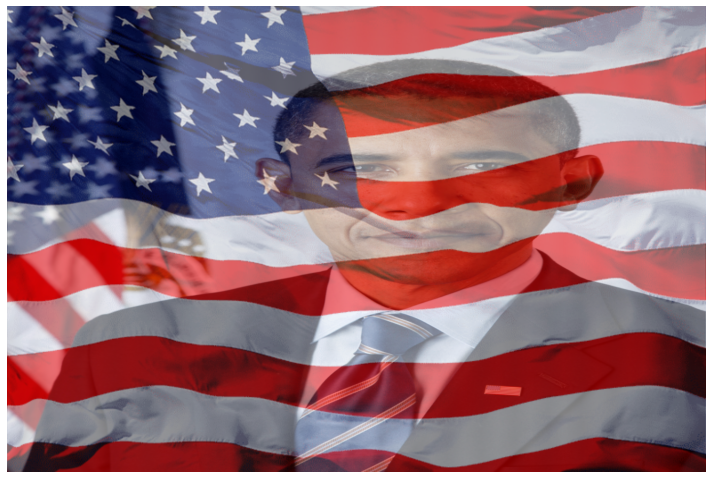

In [ ]:
R = 960 # Height/Rows of the images in (pixels)
C = 720 # Width/Columns of the images (in pixels)

# Read both images and resize them to R x C
im1 = read_image_from_file('obama.jpg', size=(C, R))
im2 = read_image_from_file('flag.png', size=(C, R))

# Create an array to store our combined image
# NOTE: dtype=np.uint8 is required for images as they value from 0 to 255
A = np.zeros((R, C*2, 3), dtype=np.uint8)
A[:, ::2] = im1
A[:, 1::2] = im2

# Plot our combined image
plot_image(A, size=(10, 10));

It is also possible to interlace the rows intead of the columns, yielding the following result

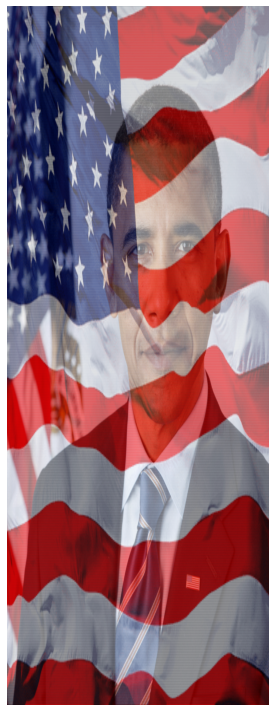

In [ ]:
A = np.zeros((R*2, C, 3), dtype=np.uint8)
A[::2, :] = im1
A[1::2, :] = im2

plot_image(A, size=(10, 10));

This results in an image that is stretched horizontally or vertically depending on whether you interlace rows or columns. We can mitigate this issue by resizing the images back to their original sizes.

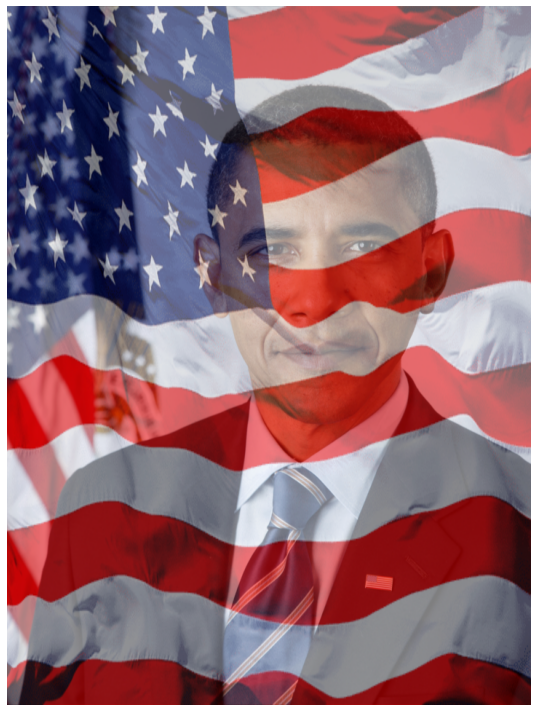

In [ ]:
# Resize it back to the original size
A = resize_image(A, size=(C, R))

# Plot our combined image
plot_image(A, size=(10, 10));

This idea can be extended from two images to any number of images with some simple changes. In the case when 3 images are interlaced we simply skip 3 columns instead of 2 by simply **changing the slice parameters**, and we can keep repeating this for any number of images. Your task is then to:

### Write the function **interlacing(L)** that takes as input a list $L$ of color images represented as arrays and combines them all into one output image through column interlacing as described above.
* If the list is empty your function should **return None**
* If the list has one image your function should **return that image**
* All images in L should be the same size so make sure you load them like in the test case below
* The starter function already contains the resizing code so you only need to focus on doing the column interlacing
* Make sure to test this function with the provided images and with **YOUR OWN IMAGES**

**Proposed Solution and Design Implementation:**

Here is my thought process for solving this problem. First check for the empty list. Next is to check for the list with one image.

Once we have that taken care of, I check the number of number of images that we have to interlace and then within those images I look at the columns. I am interlacing the images by taking the a coloumn from each image and weaving them onto the final resulting image.

In [ ]:
def interlacing(L):
  # All images have the same rows/columns so get them from the shape of the first image (Code provided to student)
  if len(L) == 0:
    return None
  if len(L) == 1:
    return L[0]

  nrows, ncols, ncolors = L[0].shape
  num_images = len(L)

  A = np.zeros((nrows, ncols * num_images, ncolors), dtype=np.uint8)

  for i in range(ncols):
    for j in range(num_images):
      A[:, i * num_images + j, :] = L[j][:, i, :]

  # Resize result back to the original size (Code provided to student)
  A = resize_image(A, size=(ncols, nrows))
  return A

#%% Test the function
R = 960 # Height/Rows of the images in (pixels)
C = 720 # Width/Columns of the images (in pixels)

# Read all images and resize them to R x C
im1 = read_image_from_file('obama.jpg', size=(C, R))
im2 = read_image_from_file('flag.png', size=(C, R))
im3 = read_image_from_file('eagle.png', size=(C, R))
im4 = read_image_from_file('liberty.png', size=(C, R))
im5 = read_image_from_file('mexico.jpeg', size =(C, R))
im6 = read_image_from_file('hokusai_wave.jpeg', size =(C, R))
im7 = read_image_from_file('arches_park.jpg', size=(C, R))
im8 = read_image_from_file('park.jpeg', size=(C, R))
im9 = read_image_from_file('gloves.jpeg', size=(C, R))
im10 = read_image_from_file('kiwi.jpeg', size=(C, R))
im11 = read_image_from_file('mona_lisa.jpeg', size=(C, R))
im12 = read_image_from_file('sunday_afternoon_park.jpeg', size=(C, R))
im13 = read_image_from_file('sports.jpg', size=(C, R))
im14 = read_image_from_file('upside_down_city.jpeg', size=(C, R))
im15 = read_image_from_file('upside_down_umbrellas.jpeg', size=(C, R))
im16 = read_image_from_file('ships_illusions.jpeg', size=(C, R))
im17 = read_image_from_file('aboral_office.jpeg', size=(C, R))
im18 = read_image_from_file('city.jpeg', size=(C, R))
im19 = read_image_from_file('manhattan.jpeg', size=(C, R))
im20 = read_image_from_file('geometric_art_one.jpeg', size=(C, R))
im21 = read_image_from_file('geometric_art_two.jpeg', size=(C, R))
im22 = read_image_from_file('flemish_proverbs.jpeg', size=(C, R))
im23 = read_image_from_file('french_beach.jpeg', size=(C, R))

# Create our combined image
# Theme: United States of America
A = interlacing([im1, im2, im3, im4])
# Theme: Major Cities
A2 = interlacing([im5, im14, im18])
# Theme: Famous Art
A3 = interlacing([im6, im11, im22])

# Plot our combined image
plot_image(A, size=(10, 10));
plot_image(A2, size=(10,10));
plot_image(A3, size=(10,10))

Output hidden; open in https://colab.research.google.com to view.

I am not entirely sure on the time complexity for this method, but I believe that it is somewhere in the order of O(num_cols * num_images) 

For extra credit, you may attempt to solve the following problems:

**Note: I decided to not do the extra credit problems**

**Conclusion:**

In conclusion, this lab highlights the crucial role that arrays play in the field of computer vision. By representing images as arrays, we are able to manipulate them and perform various operations, thereby allowing us to perform image processing tasks. 

## Extra Credit Problem 1 - Horizontal Edges
Display the horizontal edges of a grayscale image. You can find horizontal edges by subtracting adjacent rows in the image array. You need to solve this problem without using for loops.

Hint: Use the np.roll() function to shift the rows/cols of an image by 1 and then subtract from the original image.

In [ ]:
def horizontal_edges(im):
    im_gray = grayscale(im)
    return im_gray

# Test the function

# Sample image (provided)
I = read_image_from_file('sports.jpg')
plot_image(read_image_from_file('sports.jpg'), '', size=(20, 8));

# Provide the expected output for this function
print('Expected Output')
plot_image(horizontal_edges(I), 'horizontal_edges_output.png', size=(20, 8));


NameError: ignored

## Extra Credit Problem 2 - Vertical Edges
Display the vertical edges of a grayscale image. You can find vertical edges by subtracting adjacent columns in the image array. You need to solve this problem without using for loops.

Hint: Use the np.roll() function to shift the rows/cols of an image by 1 and then subtract from the original image.

In [ ]:
def vertical_edges(im):
  im_gray = grayscale(im)
  return im_gray

# Test the function
# Sample image (provided)
I = read_image_from_file('sports.jpg')
plot_image(read_image_from_file('sports.jpg'), '', size=(20, 8));


# Provide the expected output for this function
print('Expected Output')
plot_image(vertical_edges(I), 'Vertical Edges', size=(20, 8));

NameError: ignored